<a href="https://colab.research.google.com/github/034adarsh/Gender-Pay-Gap-Analysis-And-Prediction/blob/main/Gender_Pay_Gap_Analysis_%26_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  # About the Dataset
  The data set has been taken from glassdoor and focuses on income for various job titles based on gender. As there have been many studies showcasing that women are paid less than men for the same job titles, this data set will be helpful in identifying the depth of the gender-based pay gap. The features of the data set are: Job Title Gender Age PerfEval Education Dept Seniority Base Pay, and Bonus.








In [40]:
import numpy as np
import pandas as pd
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly.offline as py
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as px
import seaborn as sns
# Load the dataset
df = pd.read_csv('Glassdoor Gender Pay Gap.csv')
df['TotalPay'] = df['BasePay'] + df['Bonus']
df.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus,TotalPay
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938,52301
1,Software Engineer,Male,21,5,College,Management,5,108476,11128,119604
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268,99476
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154,118234
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319,108783


# Analysis Phase
The primary goal of the Analysis Phase is to gain a deep understanding of the existing gender pay gap within the organization, identify contributing factors, and prepare the data for predictive modeling.

### Descriptive Statistics

In [41]:
gender_stats = df.groupby('Gender')['BasePay', 'Bonus', 'TotalPay'].describe()
print(gender_stats)

       BasePay                                                          \
         count          mean           std      min       25%      50%   
Gender                                                                   
Female   468.0  89942.818376  24378.277510  34208.0  73186.25  89913.5   
Male     532.0  98457.545113  25517.520327  36642.0  81452.50  98223.0   

                             Bonus               ...                   \
              75%       max  count         mean  ...     75%      max   
Gender                                           ...                    
Female  106923.25  160614.0  468.0  6474.012821  ...  8090.0  10768.0   
Male    115606.25  179726.0  532.0  6461.133459  ...  7989.0  11293.0   

       TotalPay                                                            \
          count           mean           std      min       25%       50%   
Gender                                                                      
Female    468.0   96416.831197  

<ipython-input-41-c0a34c129dde>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



### Data Visualization

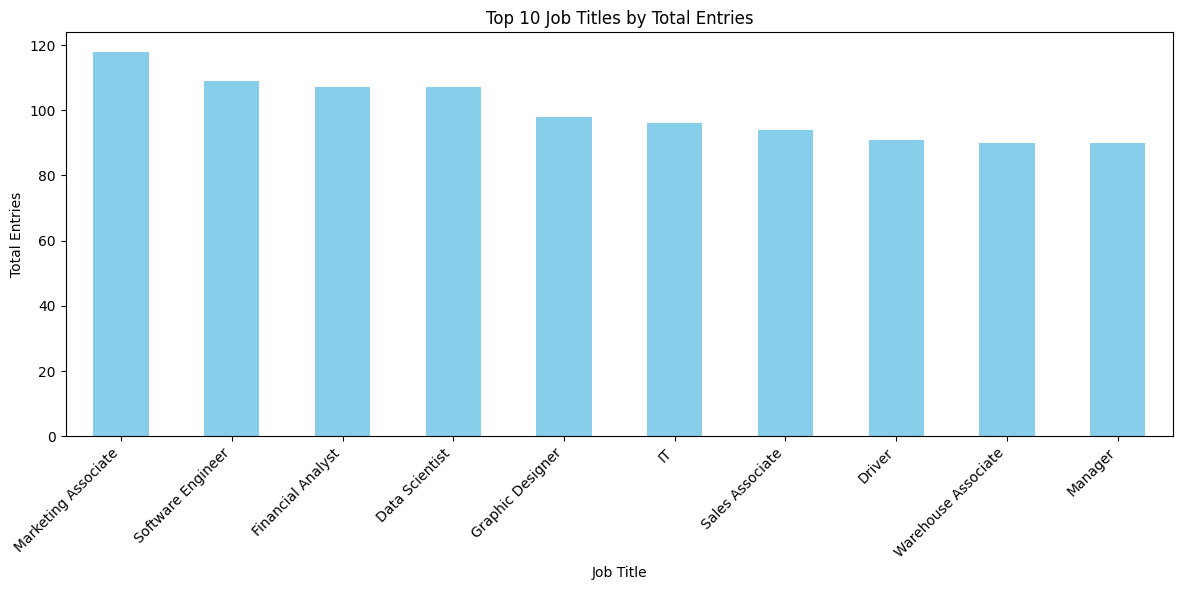

In [42]:
# Grouping and sorting by the number of entries per job title
title_counts = df['JobTitle'].value_counts().sort_values(ascending=False)

# Creating the bar chart
plt.figure(figsize=(12, 6))
title_counts[:15].plot(kind='bar', color='skyblue')
plt.title('Top 10 Job Titles by Total Entries')
plt.xlabel('Job Title')
plt.ylabel('Total Entries')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensures the labels fit within the figure
plt.show()

In [43]:
# Group the data by Seniority and count the occurrences of each gender
seniority_distribution = df.groupby(['Seniority', 'Gender']).size().unstack(fill_value=0)

# Create Pie chart traces for Female and Male
female = go.Pie(
    labels=seniority_distribution.index,
    values=seniority_distribution['Female'],
    name="Female",
    hole=0.5,
    domain={'x': [0, 0.46]}
)

male = go.Pie(
    labels=seniority_distribution.index,
    values=seniority_distribution['Male'],
    name="Male",
    hole=0.5,
    domain={'x': [0.52, 1]}
)

# Define the layout
layout = dict(
    title='Seniority Level Distribution by Gender',
    font=dict(size=14),
    legend=dict(orientation="h"),
    annotations=[
        dict(x=0.2, y=0.5, text='Female', showarrow=False, font=dict(size=20)),
        dict(x=0.8, y=0.5, text='Male', showarrow=False, font=dict(size=20))
    ]
)

# Create the figure
fig = go.Figure(data=[female, male], layout=layout)

# Display the interactive chart
py.iplot(fig)

In [44]:
# Group the data by Education and count the occurrences of each gender
education_distribution = df.groupby(['Education', 'Gender']).size().unstack(fill_value=0)

# Create Pie chart traces for Female and Male
female = go.Pie(
    labels=education_distribution.index,
    values=education_distribution['Female'],
    name="Female",
    hole=0.5,
    domain={'x': [0, 0.46]}
)

male = go.Pie(
    labels=education_distribution.index,
    values=education_distribution['Male'],
    name="Male",
    hole=0.5,
    domain={'x': [0.52, 1]}
)

# Define the layout
layout = dict(
    title='Education Level Distribution by Gender',
    font=dict(size=14),
    legend=dict(orientation="h"),
    annotations=[
        dict(x=0.2, y=0.5, text='Female', showarrow=False, font=dict(size=20)),
        dict(x=0.8, y=0.5, text='Male', showarrow=False, font=dict(size=20))
    ]
)

# Create the figure
fig = go.Figure(data=[female, male], layout=layout)

# Display the interactive chart
py.iplot(fig)

We can conclude that the data is well distributed and captures roughly equal number of male and female entries based on seniority, education and Job titles.

### Hypothesis Testing

In [45]:
# Hypothesis testing (e.g., t-test)
male_pay = df[df['Gender'] == 'Male']['TotalPay']
female_pay = df[df['Gender'] == 'Female']['TotalPay']

t_stat, p_value = stats.ttest_ind(male_pay, female_pay)
print(f'T-test statistic: {t_stat}, p-value: {p_value}')

T-test statistic: 5.407461816876623, p-value: 8.000016978237565e-08


**Conclusion Of The Statistical Analysis**

---




There is a statistically significant difference in total pay between genders in the dataset. In other words, the data provides strong evidence that gender has an impact on
total pay, and it is not likely due to random chance.

However, remember that statistical significance does not imply causation or provide insights into the reasons behind the gender pay gap. Further analysis may be needed to understand the factors contributing to this difference.

### Factors Affecting the Gender Pay Gap

In [46]:
# Pay gap by job title
job_title_pay = df.groupby('JobTitle')['TotalPay'].mean().sort_values(ascending=False)
print(job_title_pay)

# Pay gap by education level
education_pay = df.groupby('Education')['TotalPay'].mean().sort_values(ascending=False)
print(education_pay)

# Pay gap by seniority
seniority_pay = df.groupby('Seniority')['TotalPay'].mean().sort_values(ascending=False)
print(seniority_pay)

JobTitle
Manager                131392.177778
Software Engineer      112161.412844
Financial Analyst      101403.626168
Sales Associate         99670.787234
Data Scientist          98918.411215
Graphic Designer        97674.530612
IT                      97030.395833
Warehouse Associate     96798.444444
Driver                  95778.890110
Marketing Associate     82802.127119
Name: TotalPay, dtype: float64
Education
PhD            106637.962185
Masters        104058.242188
College         98672.784232
High School     94871.426415
Name: TotalPay, dtype: float64
Seniority
5    120548.886010
4    110955.206522
3    101073.228311
2     90733.765550
1     82870.394872
Name: TotalPay, dtype: float64


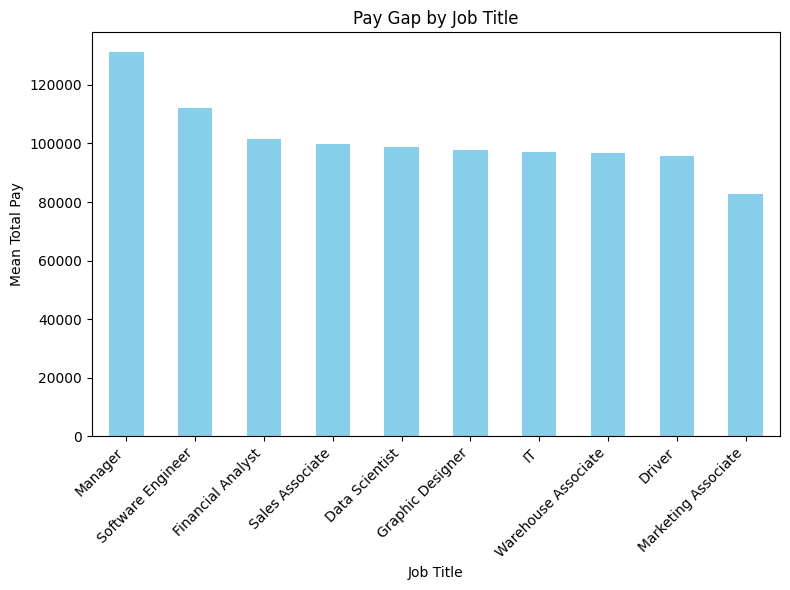

In [47]:

# Pay gap by job title
job_title_pay = df.groupby('JobTitle')['TotalPay'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
job_title_pay.plot(kind='bar', color='skyblue')
plt.title('Pay Gap by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Mean Total Pay')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

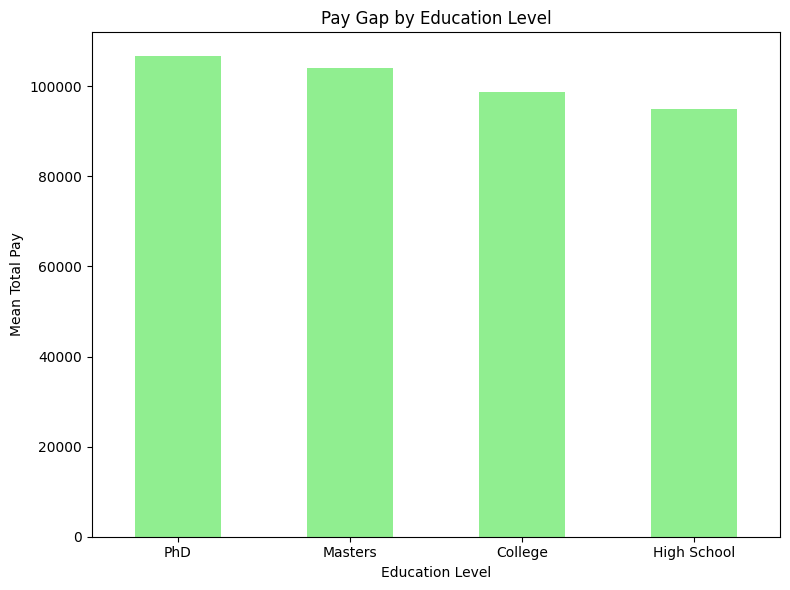

In [48]:
# Pay gap by education level
education_pay = df.groupby('Education')['TotalPay'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
education_pay.plot(kind='bar', color='lightgreen')
plt.title('Pay Gap by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Mean Total Pay')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

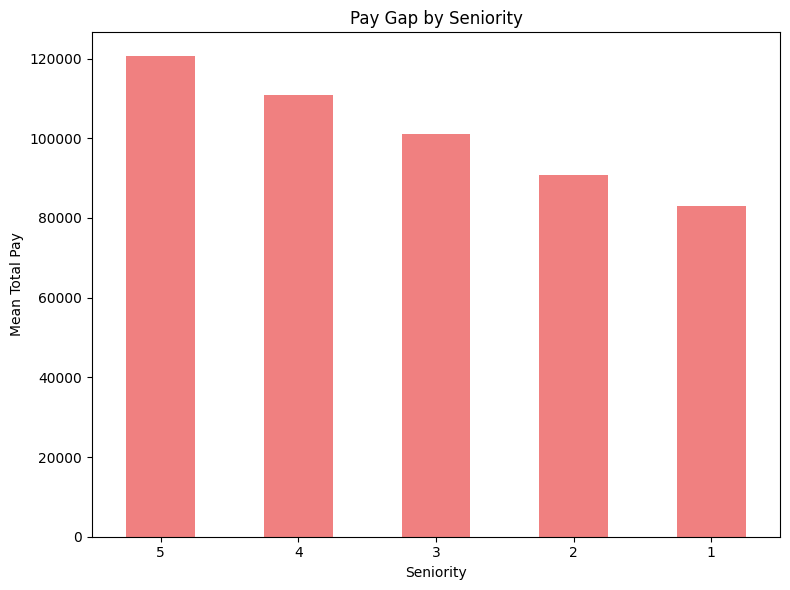

In [49]:
# Pay gap by seniority
seniority_pay = df.groupby('Seniority')['TotalPay'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
seniority_pay.plot(kind='bar', color='lightcoral')
plt.title('Pay Gap by Seniority')
plt.xlabel('Seniority')
plt.ylabel('Mean Total Pay')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Data Visualization Of Reasons Behind Pay Gap

In [50]:
# Grouping the data by Gender and JobTitle and counting the occurrences
job_distribution = df.groupby(['Gender', 'JobTitle']).size().unstack().reset_index()

# Calculate the total count of entries by gender
total_entries_by_gender = job_distribution.sum(axis=1)

# Calculate the percentage of each job title by gender
job_distribution_percent = job_distribution.copy()
for column in job_distribution.columns[1:]:
    job_distribution_percent[column] = job_distribution_percent[column] / total_entries_by_gender * 100

# Create an interactive bar chart with percentages on the graph
fig = px.bar(job_distribution_percent, x='Gender', y=job_distribution_percent.columns[1:],
             barmode='stack', title='Job Distribution by Gender (Percentage)',
             labels={'JobTitle': 'Job Title', 'value': 'Percentage'},
             color_discrete_sequence=px.colors.qualitative.Set3)

# Customize the layout
fig.update_layout(xaxis_title='Gender', yaxis_title='Percentage')

# Add custom text labels with percentages
for col in job_distribution_percent.columns[1:]:
    fig.update_traces(text=job_distribution_percent[col].round(2).astype(str) + '%', selector=dict(name=col))

fig.show()

<ipython-input-50-ca6733742dde>:5: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



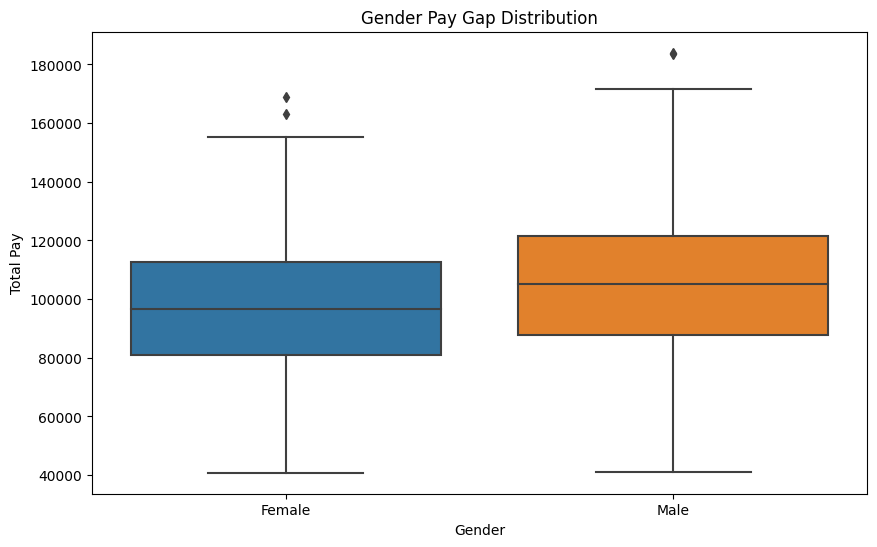

In [51]:
# Box plot showing pay distribution by gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='TotalPay', data=df)
plt.title('Gender Pay Gap Distribution')
plt.xlabel('Gender')
plt.ylabel('Total Pay')
plt.show()

In [52]:
# Separate age data by gender
age_female = df[df['Gender'] == 'Female']['Age']
age_male = df[df['Gender'] == 'Male']['Age']

hist_data = [age_female, age_male]

group_labels = ['Female', 'Male']
colors = ['#835AF1', '#333F44']

# Create a distribution plot
fig = ff.create_distplot(hist_data, group_labels, colors=colors, show_curve=True)

# Customize the layout
layout = go.Layout(
    title='Distribution of Age by Gender',
    xaxis=dict(title='Age'),
    yaxis=dict(title='Density'),
)

fig['layout'].update(layout)

# Show the plot
py.iplot(fig)

**The above graph shows No. of male employees are more from the age group 18 - 30 years and 55 - 64 years, while females are more from the 30s to mid 50s.**

<ipython-input-53-c769e9dc9805>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




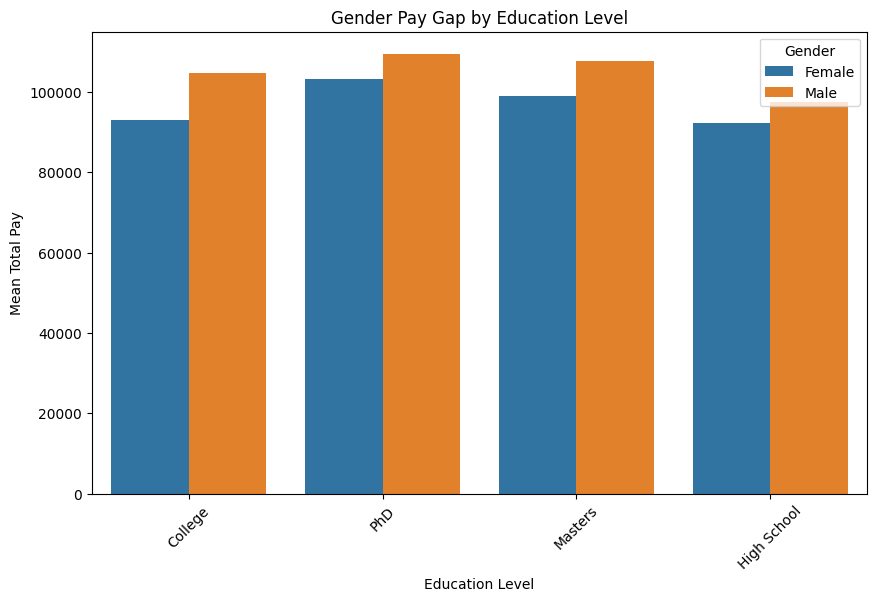

In [53]:
# Create a bar chart showing pay gap by education level
plt.figure(figsize=(10, 6))
sns.barplot(x='Education', y='TotalPay', hue='Gender', data=df, ci=None)
plt.title('Gender Pay Gap by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Mean Total Pay')
plt.xticks(rotation=45)
plt.show()

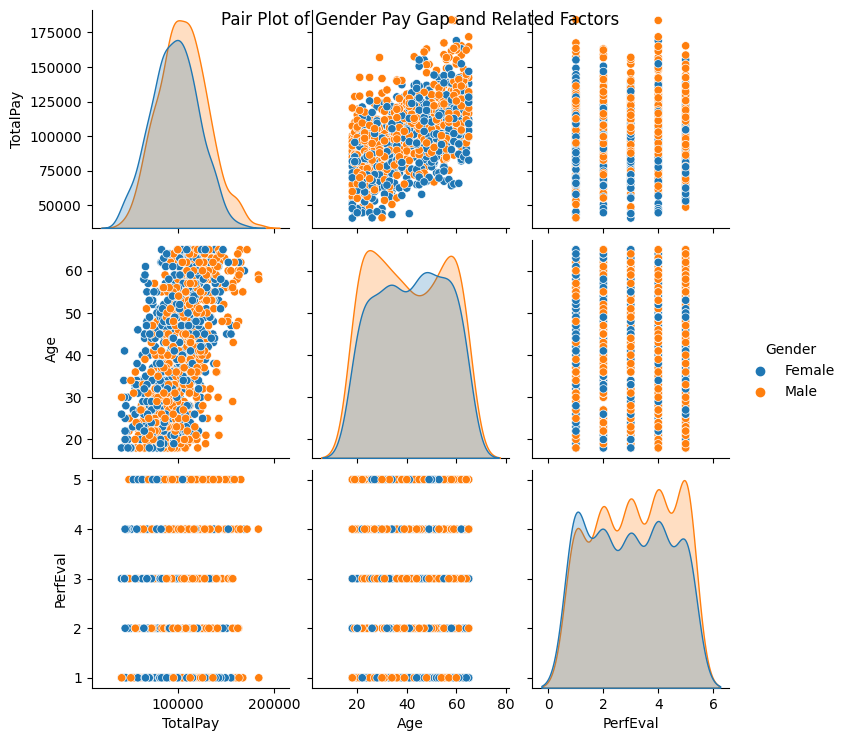

In [54]:
# Creating a pair plot to visualize relationships between numerical variables
sns.pairplot(df[['Gender', 'TotalPay', 'Age', 'PerfEval']], hue='Gender', diag_kind='kde')
plt.suptitle('Pair Plot of Gender Pay Gap and Related Factors')
plt.show()

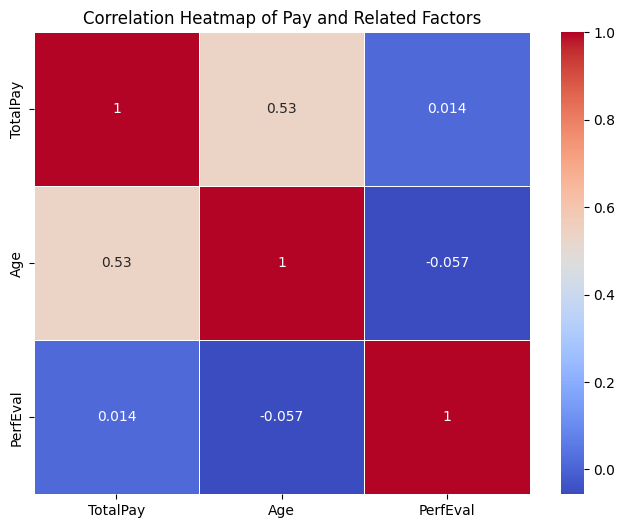

In [55]:
# Create a heatmap to visualize correlations between numerical variables
correlation_matrix = df[['TotalPay', 'Age', 'PerfEval']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Pay and Related Factors')
plt.show()

**Pre-Processing**


---


Grouping data by job title for males and females.

Calculating the average bonus, base and total pay for them.

In [56]:
# Group data by job title for females and males
female_grouped = df[df['Gender'] == 'Female'].groupby('JobTitle')[['BasePay', 'TotalPay', 'Bonus']].mean()
male_grouped = df[df['Gender'] == 'Male'].groupby('JobTitle')[['BasePay', 'TotalPay', 'Bonus']].mean()

# Calculate the count of females and males in each job title category
female_count = df[df['Gender'] == 'Female'].groupby('JobTitle')['Gender'].count()
male_count = df[df['Gender'] == 'Male'].groupby('JobTitle')['Gender'].count()

# Normalize pay components by the number of females and males in each job title category
female_grouped['BasePay'] /= female_count.tolist()
female_grouped['TotalPay'] /= female_count.tolist()
female_grouped['Bonus'] /= female_count.tolist()
male_grouped['BasePay'] /= male_count.tolist()
male_grouped['TotalPay'] /= male_count.tolist()
male_grouped['Bonus'] /= male_count.tolist()

# Create DataFrames for the normalized data
female_df = pd.DataFrame(female_grouped)
male_df = pd.DataFrame(male_grouped)

# Rename columns for clarity
female_df.columns = ['Normalized_BasePay', 'Normalized_TotalPay', 'Normalized_Bonus']
male_df.columns = ['Normalized_BasePay', 'Normalized_TotalPay', 'Normalized_Bonus']

# Display the average pay components normalized by gender and job title in tabular form
print("Average Pay Components for Females (Normalized by no. of Male and Female):")
print(female_df.to_string())

print("\nAverage Pay Components for Males (Normalized by no. of Male and Female):")
print(male_df.to_string())

Average Pay Components for Females (Normalized by no. of Male and Female):
                     Normalized_BasePay  Normalized_TotalPay  Normalized_Bonus
JobTitle                                                                      
Data Scientist              1805.750801          1933.061588        127.310787
Driver                      1888.426749          2026.029301        137.602552
Financial Analyst           1948.129113          2076.401083        128.271970
Graphic Designer            1921.735243          2058.550347        136.815104
IT                          1809.514400          1936.758800        127.244400
Manager                     7069.570988          7402.459877        332.888889
Marketing Associate          711.394183           768.702332         57.308149
Sales Associate             2137.074635          2284.198486        147.123851
Software Engineer          11837.625000         12643.421875        805.796875
Warehouse Associate         2009.310019          2175.73

In [57]:
# Group data by job title for females and males
female_grouped = df[df['Gender'] == 'Female'].groupby('JobTitle')[['BasePay', 'TotalPay', 'Bonus']].mean()
male_grouped = df[df['Gender'] == 'Male'].groupby('JobTitle')[['BasePay', 'TotalPay', 'Bonus']].mean()

# Reset the index for both DataFrames
female_grouped.reset_index(inplace=True)
male_grouped.reset_index(inplace=True)

# Create a new DataFrame for combined data
combined_df = pd.concat([female_grouped, male_grouped], axis=0, keys=['Female', 'Male'])
combined_df.reset_index(level=0, inplace=True)
combined_df.rename(columns={'level_0': 'Gender'}, inplace=True)

# Melt the DataFrame for better plotting
melted_df = pd.melt(combined_df, id_vars=['JobTitle', 'Gender'], value_vars=['BasePay', 'TotalPay', 'Bonus'],
                    var_name='Category', value_name='Average Pay', col_level=0)

# Round the values in the 'Average Pay' column
melted_df['Average Pay'] = melted_df['Average Pay'].round(2)

# Create a grouped bar chart using Plotly Express
fig = px.bar(melted_df, x='JobTitle', y='Average Pay', color='Gender', facet_col='Category',
             labels={'Average Pay': 'Average Pay (Normalized by No. of Male & Female)'}, facet_col_wrap=3,
             category_orders={"Category": ["BasePay", "TotalPay", "Bonus"]},
             text='Average Pay',  # Add value labels to the bars
             title='Average Pay Components by Job Title (Normalized by Gender)')

# Customize the layout
fig.update_layout(
    xaxis=dict(title='Job Title'),
    yaxis=dict(title='Average Pay'),
    showlegend=True,  # Show separate legends for male and female
)

# Show the plot
fig.show()

In [58]:
# Group data by job title for females and males
female_grouped = df[df['Gender'] == 'Female'].groupby('JobTitle')[['BasePay']].mean()
male_grouped = df[df['Gender'] == 'Male'].groupby('JobTitle')[['BasePay']].mean()

# Reset the index for both DataFrames
female_grouped.reset_index(inplace=True)
male_grouped.reset_index(inplace=True)

# Create a bar trace for BasePay gap for females
base_pay_trace_female = go.Bar(name='Female', x=female_grouped['JobTitle'], y=female_grouped['BasePay'])

# Create a bar trace for BasePay gap for males
base_pay_trace_male = go.Bar(name='Male', x=male_grouped['JobTitle'], y=male_grouped['BasePay'])

# Create a figure with the bar traces
base_pay_fig = go.Figure(data=[base_pay_trace_female, base_pay_trace_male])

# Customize the layout
base_pay_fig.update_layout(
    barmode='group',  # Display bars grouped
    title='BasePay Gap by Job Title',
    xaxis=dict(title='Job Title'),
    yaxis=dict(title='BasePay'),
)

# Show the plot
py.iplot(base_pay_fig)

In [59]:
# Group data by job title for females and males
female_grouped = df[df['Gender'] == 'Female'].groupby('JobTitle')[['Bonus']].mean().reset_index()
male_grouped = df[df['Gender'] == 'Male'].groupby('JobTitle')[['Bonus']].mean().reset_index()

# Create a bar trace for Bonus Pay gap for females
bonus_pay_trace_female = go.Bar(name='Female', x=female_grouped['JobTitle'], y=female_grouped['Bonus'])

# Create a bar trace for Bonus Pay gap for males
bonus_pay_trace_male = go.Bar(name='Male', x=male_grouped['JobTitle'], y=male_grouped['Bonus'])

# Create a figure for Bonus Pay
bonus_pay_fig = go.Figure(data=[bonus_pay_trace_female, bonus_pay_trace_male])

# Customize the layout for Bonus Pay
bonus_pay_fig.update_layout(
    barmode='group',  # Display bars grouped
    title='Bonus Pay Gap by Job Title',
    xaxis=dict(title='Job Title'),
    yaxis=dict(title='Bonus Pay'),
)

# Show the Bonus Pay plot
py.iplot(bonus_pay_fig)

In [60]:
# Group data by job title for females and males
female_grouped = df[df['Gender'] == 'Female'].groupby('JobTitle')[['TotalPay']].mean().reset_index()
male_grouped = df[df['Gender'] == 'Male'].groupby('JobTitle')[['TotalPay']].mean().reset_index()

# Create a bar trace for Total Pay gap for females
total_pay_trace_female = go.Bar(name='Female', x=female_grouped['JobTitle'], y=female_grouped['TotalPay'])

# Create a bar trace for Total Pay gap for males
total_pay_trace_male = go.Bar(name='Male', x=male_grouped['JobTitle'], y=male_grouped['TotalPay'])

# Create a figure for Total Pay
total_pay_fig = go.Figure(data=[total_pay_trace_female, total_pay_trace_male])

# Customize the layout for Total Pay
total_pay_fig.update_layout(
    barmode='group',  # Display bars grouped
    title='Total Pay Gap by Job Title',
    xaxis=dict(title='Job Title'),
    yaxis=dict(title='Total Pay'),
)

# Show the Total Pay plot
py.iplot(total_pay_fig)

In [61]:
# Calculate the difference in TotalPay between males and females for each job title
total_pay_difference = male_grouped['TotalPay'] - female_grouped['TotalPay']

# Create a bar trace for the difference
total_pay_difference_trace = go.Bar(name='Difference', x=female_grouped['JobTitle'], y=total_pay_difference)

# Create a figure with the bar trace
total_pay_difference_fig = go.Figure(data=[total_pay_difference_trace])

# Customize the layout
total_pay_difference_fig.update_layout(
    barmode='group',  # Display bars grouped
    title='Total Pay Gap [Male - Female] by Job Title',
    xaxis=dict(title='Job Title'),
    yaxis=dict(title='Total Pay Gap'),
)

# Show the plot
py.iplot(total_pay_difference_fig)

In [62]:
diff = (male_grouped['TotalPay'] - female_grouped['TotalPay']).tolist()
titles = ["Data Scientist", "Driver", "Financial Analyst", "Graphic Designer", "IT", "Manager", "Marketing Associate", "Sales Associate", "Software Engineer", "Warehouse Associate"]

for i in range(len(diff)):
    if diff[i] > 0:
        print('Men make ' + str(int(diff[i])) + ' more than Women as a ' + titles[i])
    else:
        print('Men make ' + str(int(-diff[i])) + ' less than Women as a ' + titles[i])

Men make 7002 less than Women as a Data Scientist
Men make 5220 more than Women as a Driver
Men make 627 less than Women as a Financial Analyst
Men make 2226 less than Women as a Graphic Designer
Men make 401 more than Women as a IT
Men make 2315 less than Women as a Manager
Men make 5910 more than Women as a Marketing Associate
Men make 2673 more than Women as a Sales Associate
Men make 11886 more than Women as a Software Engineer
Men make 6720 less than Women as a Warehouse Associate


### Conclusion
* There has been significant improvement in reducing the wage gap
* Not only do the females make almost equal amounts to men they even exceed their pay in certain fields
* Out of the total 10 job titles in the dataset, on an average men make more in 5 while females make more in 5
* A huge gap can be seen for females making 5k less than men as a Marketing associate and a Software Engineer
* While men make around 6k less than females as a Data Scientist and a Warehouse Associate

# Prediction Phase
The Prediction Phase focuses on developing a predictive model to forecast gender pay disparities based on the insights gained from the analysis.

## Linear Regression

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Exclude the 'Dept' column and any other non-numeric columns from features (X)
X = df.select_dtypes(include=['number']).drop(columns=['TotalPay'])  # Exclude 'TotalPay' as well
y = df['TotalPay']

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

Mean Absolute Error (MAE): 1.3824319466948509e-11
Mean Squared Error (MSE): 3.668711452795188e-22
Root Mean Squared Error (RMSE): 1.9153880684590233e-11
R-squared (R2): 1.0


**Feature Importance Analysis with Linear Regression**

In [80]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# Assuming you have your data in a DataFrame called 'df'
# Separate the target variable (TotalPay) and features
X = df.select_dtypes(include=['number']).drop(columns=['TotalPay'])  # Features
y = df['TotalPay']  # Target variable

# Create and fit a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X, y)

# Get the coefficients and corresponding feature names
coefficients = linear_model.coef_
feature_names = X.columns

# Create a DataFrame to display the coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by coefficient values to find important features
coefficients_df['Absolute_Coefficient'] = coefficients_df['Coefficient'].abs()
sorted_coefficients_df = coefficients_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Print the sorted DataFrame to see the important features
print("Linear Regression Coefficients:")
print(sorted_coefficients_df)

Linear Regression Coefficients:
     Feature   Coefficient  Absolute_Coefficient
4      Bonus  1.000000e+00          1.000000e+00
3    BasePay  1.000000e+00          1.000000e+00
1   PerfEval -1.764699e-12          1.764699e-12
2  Seniority -7.608273e-13          7.608273e-13
0        Age  1.623289e-13          1.623289e-13


## Decision Tree Model

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Exclude the 'Dept' column and any other non-numeric columns from features (X)
X = df.select_dtypes(include=['number']).drop(columns=['TotalPay'])  # Exclude 'TotalPay' as well
y = df['TotalPay']

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Regressor model
model = DecisionTreeRegressor(random_state=42)  # You can adjust hyperparameters as needed.

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

Mean Absolute Error (MAE): 910.555
Mean Squared Error (MSE): 1485001.735
Root Mean Squared Error (RMSE): 1218.606472574309
R-squared (R2): 0.997632947329999


**Feature Importance Analysis with Decision Tree**

In [82]:
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

# Assuming you have your data in a DataFrame called 'df'
# Separate the target variable (TotalPay) and features
X = df.select_dtypes(include=['number']).drop(columns=['TotalPay'])  # Features
y = df['TotalPay']  # Target variable

# Create and fit a Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)  # You can adjust parameters as needed
dt_model.fit(X, y)

# Get feature importances
feature_importances = dt_model.feature_importances_
feature_names = X.columns

# Create a DataFrame to display feature importances and feature names
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance values to find important features
sorted_importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted DataFrame to see the important features
print("Decision Tree Feature Importances:")
print(sorted_importance_df)


Decision Tree Feature Importances:
     Feature  Importance
3    BasePay    0.995106
4      Bonus    0.004593
1   PerfEval    0.000145
0        Age    0.000092
2  Seniority    0.000064


### Results

**The MAE** of 910.555 suggests that, on average, the model's predictions are off by approximately 910.56.

**The MSE and RMSE** values are relatively low, indicating that the model's predictions are generally close to the actual values.

**The R-squared (R2)** value of 0.9976 is very close to 1, indicating that the model explains a high proportion of the variance in the target variable.

## Random Forest Model

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Exclude the 'Dept' column and any other non-numeric columns from features (X)
X = df.select_dtypes(include=['number']).drop(columns=['TotalPay'])  # Exclude 'TotalPay' as well
y = df['TotalPay']

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of estimators as needed.

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

# Optionally, you can also examine the feature importances
feature_importances = model.feature_importances_
print('Feature Importances:', feature_importances)

Mean Absolute Error (MAE): 548.1618499999995
Mean Squared Error (MSE): 656936.7038574995
Root Mean Squared Error (RMSE): 810.5163193036273
R-squared (R2): 0.998952860631582
Feature Importances: [3.07880044e-04 5.09956521e-04 1.57428606e-04 9.95515885e-01
 3.50884979e-03]


**Feature Importance Analysis with Random Forest**

In [95]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Assuming you have your data in a DataFrame called 'df'
# Separate the target variable (TotalPay) and features
X = df.select_dtypes(include=['number']).drop(columns=['TotalPay'])# Features
y = df['TotalPay']  # Target variable

# Create and fit a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust parameters as needed
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame to display feature importances and feature names
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance values to find important features
sorted_importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted DataFrame to see the important features
print("Random Forest Feature Importances:")
print(sorted_importance_df)

Random Forest Feature Importances:
     Feature  Importance
3    BasePay    0.995354
4      Bonus    0.003901
1   PerfEval    0.000379
0        Age    0.000264
2  Seniority    0.000101


### Results

**These metrics suggest that the Random Forest model is performing very well on the test data.**

Here's what these metrics mean:

**MAE (Mean Absolute Error):**

This is the average absolute difference between the actual and predicted values. A lower MAE indicates better model performance, and a value of 548.16 suggests that, on average, the model's predictions are off by approximately 548.

**MSE (Mean Squared Error):**

This measures the average squared difference between actual and predicted values. Lower MSE values are better, and 656936.70 suggests that there is some variability in the predictions.

**RMSE (Root Mean Squared Error):**

This is the square root of MSE and is often easier to interpret. It's also approximately 810, which indicates the typical prediction error.

**R-squared (R2):**

R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variables. An R2 value close to 1 (0.9989 in this case) indicates that the model explains nearly all the variance in the target variable.

## XGBoost Model

In [66]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Exclude the 'Dept' column and any other non-numeric columns from features (X)
X = df.select_dtypes(include=['number']).drop(columns=['TotalPay'])  # Exclude 'TotalPay' as well
y = df['TotalPay']

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost Regressor model
model = xgb.XGBRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters as needed.

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

# Optionally, you can also examine the feature importances
feature_importances = model.feature_importances_
print('Feature Importances:', feature_importances)

Mean Absolute Error (MAE): 534.67490234375
Mean Squared Error (MSE): 619334.309580307
Root Mean Squared Error (RMSE): 786.977960034655
R-squared (R2): 0.9990127978327814
Feature Importances: [2.1347997e-04 2.9167070e-04 3.0116519e-04 9.9471205e-01 4.4815624e-03]


**Feature Importance Analysis with XGBoost**

In [96]:
import xgboost as xgb
import pandas as pd

# Assuming you have your data in a DataFrame called 'df'
# Separate the target variable (TotalPay) and features
X = df.select_dtypes(include=['number']).drop(columns=['TotalPay'])  # Features
y = df['TotalPay']  # Target variable

# Create an XGBoost Regressor model
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)  # You can adjust parameters as needed
xgb_model.fit(X, y)

# Get feature importances
feature_importances = xgb_model.feature_importances_
feature_names = X.columns

# Create a DataFrame to display feature importances and feature names
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance values to find important features
sorted_importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted DataFrame to see the important features
print("XGBoost Feature Importances:")
print(sorted_importance_df)

XGBoost Feature Importances:
     Feature  Importance
3    BasePay    0.994286
4      Bonus    0.004916
1   PerfEval    0.000446
0        Age    0.000178
2  Seniority    0.000174


### Results

**These metrics indicate that the XGBoost model is performing exceptionally well on the test data.**

Here's what these metrics mean:

**The MAE** of 534.67 suggests that, on average, the model's predictions are off by approximately 534.67.

**The MSE** and RMSE values are relatively low, indicating that the model's predictions are generally close to the actual values.

**The R-squared (R2)** value of 0.9990 is very close to 1, indicating that the model explains nearly all the variance in the target variable. This suggests an excellent fit to the data.

### Comparision Table Of All The Algorithms

| Algorithm          | Mean Absolute Error (MAE) | Mean Squared Error (MSE)   | Root Mean Squared Error (RMSE) | R-squared (R2)   |
|--------------------|---------------------------|-----------------------------|--------------------------------|------------------|
| Linear Regression  | 1.3824e-11                | 3.6687e-22                  | 1.9154e-11                     | 1.0              |
| Decision Tree      | 910.555                   | 1,485,001.735               | 1218.606                        | 0.9976329        |
| Random Forest      | 548.1618                  | 656,936.7039                | 810.5163                        | 0.9989529        |
| XGBoost            | 534.6749                  | 619,334.3096                | 786.9780                        | 0.9990128        |








## Improving The Model

###  Linear Regression Analysis


In [67]:
import statsmodels.api as sm

X = df[['Age', 'PerfEval', 'Seniority', 'BasePay', 'Bonus']]
y = df['TotalPay']

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.542e+30
Date:                Mon, 02 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:18:37   Log-Likelihood:                 20974.
No. Observations:                1000   AIC:                        -4.194e+04
Df Residuals:                     994   BIC:                        -4.191e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.641e-11   4.87e-11      1.979      0.0

#### Result Of The Analysis
The results obtained from the linear regression analysis indicate a near-perfect fit to the data, as evidenced by the R-squared value of 1.000. This suggests that the model is explaining the entire variance in the target variable, 'TotalPay,' and it may be overfitting the data. Overfitting occurs when a model learns to perfectly fit the training data but fails to generalize well to new, unseen data.

### Ridge regression model

Ridge regression is a linear regression variant that includes L2 regularization, which helps prevent overfitting by adding a penalty term to the linear regression coefficients.

The alpha parameter controls the strength of regularization.

In [98]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge  # Ridge regression for regularization

# Select relevant features and the target variable
X = df[['Age', 'PerfEval', 'Seniority']]
y = df['TotalPay']

# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant (intercept) to the model
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit a Ridge regression model to address overfitting
ridge_model = Ridge(alpha=1.0)  # You can adjust the regularization strength (alpha) as needed
ridge_model.fit(X_train, y_train)

# Print the coefficients and intercept
print("Coefficients:", ridge_model.coef_)
print("Intercept:", ridge_model.intercept_)

# Evaluate the model's performance on the test set
y_pred = ridge_model.predict(X_test)

# Print evaluation metrics (e.g., Mean Absolute Error, R-squared)
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Coefficients: [   0.          958.5093614   679.45575952 9867.67644199]
Intercept: 29884.282726630714
Mean Absolute Error (MAE): 12767.17550306584
R-squared (R2): 0.5831267770246993


**Feature Importance Analysis with Ridge Regression**

In [99]:
from sklearn.linear_model import Ridge
import pandas as pd

# Assuming you have your data in a DataFrame called 'df'
# Separate the target variable (TotalPay) and features
X = df[['Age', 'PerfEval', 'Seniority']]  # Features
y = df['TotalPay']  # Target variable

# Create and fit a Ridge regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter if needed
ridge_model.fit(X, y)

# Get the coefficients and corresponding feature names
coefficients = ridge_model.coef_
feature_names = X.columns

# Create a DataFrame to display the coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by absolute coefficient values to find important features
coefficients_df['Absolute_Coefficient'] = coefficients_df['Coefficient'].abs()
sorted_coefficients_df = coefficients_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Print the sorted DataFrame to see the important features
print(sorted_coefficients_df)

     Feature  Coefficient  Absolute_Coefficient
2  Seniority  9791.478088           9791.478088
1   PerfEval  1003.431765           1003.431765
0        Age   965.392267            965.392267


#### Results
**Interpreting the results:**

The coefficients represent how each feature contributes to the predicted 'TotalPay.'
The intercept represents the 'TotalPay' when all other features are zero.

**The MAE** of 12767.18 indicates that, on average, the model's predictions have an absolute error of approximately 12,767.18 units of 'TotalPay.'



**The R-squared** value of 0.583 suggests that the model explains approximately 58.3% of the variance in 'TotalPay.'

Whether these results are considered good depends on the specific context of the analysis and the project goals:

An R-squared value of 0.583 indicates that the model explains a moderate portion of the variance in 'TotalPay.'

It suggests that there may be other factors not included in the model that contribute to 'TotalPay.'

The MAE of 12767.18 indicates that there is some prediction error, which may be acceptable depending on the practical implications of the project.

# Timeline Of The Project

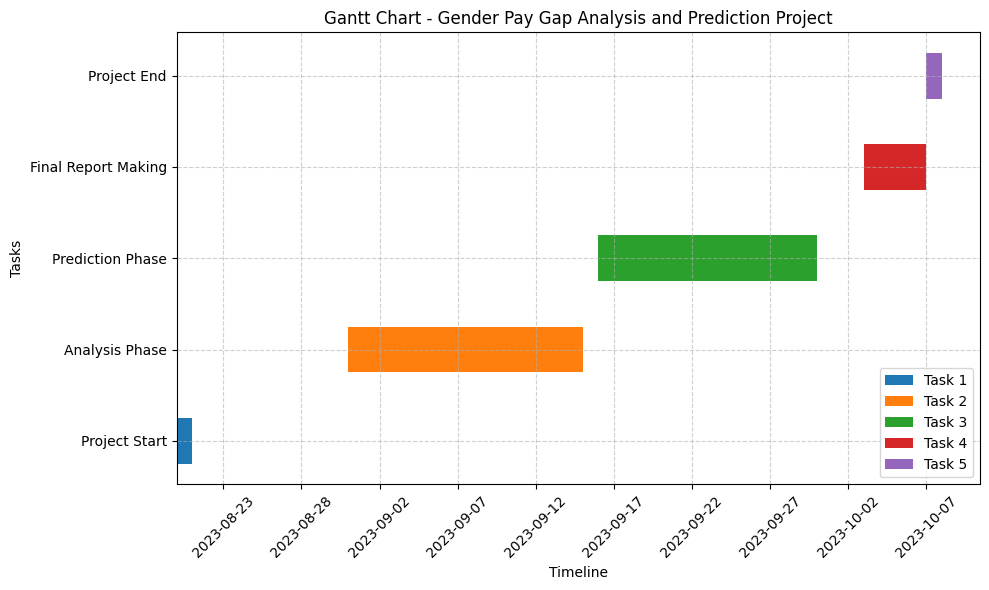

In [69]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Define project tasks and their start and end dates
tasks = [
    ('Project Start', '2023-08-20', '2023-08-21'),
    ('Analysis Phase', '2023-08-31', '2023-09-15'),
    ('Prediction Phase', '2023-09-16', '2023-09-30'),
    ('Final Report Making', '2023-10-03', '2023-10-07'),
    ('Project End', '2023-10-07', '2023-10-08'),
]

# Convert date strings to datetime objects
tasks = [(task, datetime.strptime(start_date, '%Y-%m-%d'), datetime.strptime(end_date, '%Y-%m-%d')) for task, start_date, end_date in tasks]

# Create a Gantt chart
fig, ax = plt.subplots(figsize=(10, 6))

for i, (task, start_date, end_date) in enumerate(tasks):
    ax.barh(task, end_date - start_date, left=start_date, height=0.5, label=f'Task {i + 1}')

# Format the x-axis as dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.xticks(rotation=45)

# Set labels and title
plt.xlabel('Timeline')
plt.ylabel('Tasks')
plt.title('Gantt Chart - Gender Pay Gap Analysis and Prediction Project')

# Display legend
plt.legend(loc='lower right')

# Show the Gantt chart
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()